Analise Receita Total

In [6]:
import pandas as pd

from classes.classdatabasemanager import DatabaseManager


# classe DatabaseManager para poder acedar as tabelas
db_manager = DatabaseManager()

# tabelas carregadas em df
df_produtos = db_manager.fetch_data_to_df("SELECT * FROM produtos;")
df_vendas = db_manager.fetch_data_to_df("SELECT * FROM vendas;")

# mostrar os primeiros 5 registos
display(df_produtos.head())
display(df_vendas.head())

,id,nome,preco,categoria
0,1,Portátil Dell XPS 13,120000,Portáteis
1,2,MacBook Pro 16,250000,Portáteis
2,3,Monitor LG UltraGear,45000,Monitores
3,4,Teclado Mecânico HyperX,15000,Teclados
4,5,Rato Logitech MX Master,12000,Ratos


,id,id_produto,id_cliente,id_loja,quantidade,data
0,1,6,83,4,3,2024-08-09
1,2,7,28,1,3,2024-08-16
2,3,10,64,2,2,2024-03-08
3,4,5,86,4,2,2024-11-18
4,5,3,54,3,2,2024-12-10


In [7]:
# Código para calcular produtos mais vendidos
df_merged = df_vendas.merge(df_produtos, left_on="id_produto", right_on="id")

#calcular a receita por venda
df_merged["Receita_Venda"]=df_merged["quantidade"]*df_merged["preco"]

display(df_merged.head())



,id_x,id_produto,id_cliente,id_loja,quantidade,data,id_y,nome,preco,categoria,Receita_Venda
0,1,6,83,4,3,2024-08-09,6,Placa Gráfica RTX 3080,350000,Placas Gráficas,1050000
1,2,7,28,1,3,2024-08-16,7,Processador AMD Ryzen 9,180000,Processadores,540000
2,3,10,64,2,2,2024-03-08,10,Fonte Corsair 750W,60000,Fontes de Alimentação,120000
3,4,5,86,4,2,2024-11-18,5,Rato Logitech MX Master,12000,Ratos,24000
4,5,3,54,3,2,2024-12-10,3,Monitor LG UltraGear,45000,Monitores,90000


In [8]:
#receita total por produto, do maior para o menor faturamento
receita_por_produto=df_merged.groupby("nome")["Receita_Venda"].sum().sort_values(ascending=False)
receita_por_produto_df=receita_por_produto.reset_index()
print(receita_por_produto_df.head(10))

                       nome  Receita_Venda
0    Placa Gráfica RTX 3080       33250000
1            MacBook Pro 16       23000000
2   Processador AMD Ryzen 9       21780000
3      Portátil Dell XPS 13       10320000
4      SSD NVMe Samsung 1TB        9090000
5  Memória RAM Corsair 16GB        6640000
6      Monitor LG UltraGear        4545000
7        Fonte Corsair 750W        3840000
8   Teclado Mecânico HyperX        1500000
9   Rato Logitech MX Master         876000


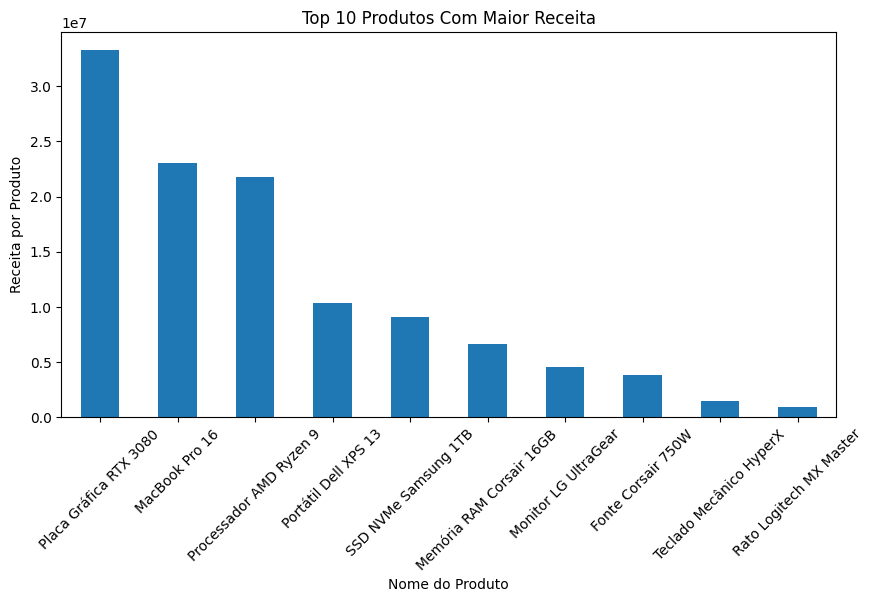

In [9]:
# Criar gráfico de barras
from utils.funcoes import criar_graficos_matplotlib_pyplot

criar_graficos_matplotlib_pyplot(receita_por_produto, "Top 10 Produtos Com Maior Receita", "Nome do Produto", "Receita por Produto")

In [10]:

from utils.funcoes import guardar_analise_csv

# guardar ficheiro em csv
guardar_analise_csv(receita_por_produto_df, "top10_receita_por_produto")



